In [110]:
from google.colab import drive

drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### load data

['/content/gdrive/My Drive/Data/emotion_classification/train/subject02.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject02.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject12.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject04.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject09.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject13.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject04.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject13.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject10.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject10.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject05.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/train/subject07.sad.gif', '/content/gdrive/My Drive/Dat

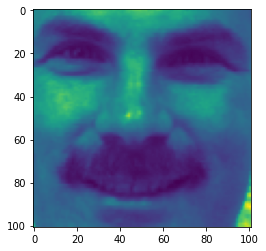

[[115 115 117 ... 220 227 213]
 [ 71  87 105 ...  65  66  71]
 [ 65  76  83 ...  57  53  54]
 ...
 [ 25  34  46 ... 163 227 255]
 [109 110 108 ... 255 255 255]
 [ 17  18  18 ...  76  67  61]]
[1, -1, -1, -1, 1, -1, 1, 1, -1, 1, -1, -1, 1, -1, 1, -1, 1, -1, 1, -1]


In [111]:
import glob
from PIL import Image
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg




filelist = glob.glob("/content/gdrive/My Drive/Data/emotion_classification/train/*.gif")
print(filelist)
img = mpimg.imread('/content/gdrive/My Drive/Data/emotion_classification/train/subject02.happy.gif')
imgplot = plt.imshow(img)
plt.show()


images = [(np.array(Image.open(file))).flatten() for file in filelist]
images=np.array(images)
print(images)
y=[]
for f in filelist:
    if f.find("sad")==-1: #assign y value as 1 if  it is happy face else -1
        y.append(1)
    else:
        y.append(-1)
print(y)   

# PCA 

In [112]:
k=20

In [113]:
from sklearn.decomposition import PCA
pca = PCA(n_components=k)
pca.fit(images)
new_data=pca.transform(images)

## SVM


In [114]:
from sklearn import svm
from sklearn.metrics import classification_report
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(new_data, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [115]:
pred=classifier_linear.predict(new_data)
from sklearn.metrics import accuracy_score
a=accuracy_score(y,pred)
print("accuaracy on train data=",a)

accuaracy on train data= 1.0


In [116]:
classifier_linear.n_support_

array([10,  8], dtype=int32)

# Test

In [117]:


filelist_test = glob.glob("/content/gdrive/My Drive/Data/emotion_classification/test/*.gif")
print(filelist_test)



images_test = [(np.array(Image.open(file))).flatten() for file in filelist_test]
images_test=np.array(images_test)
print(images_test)
y_test=[]
for f in filelist_test:
    if f.find("sad")==-1: #assign y value as 1 if  it is happy face else -1
        y_test.append(1)
    else:
        y_test.append(-1)
print(y_test)   

['/content/gdrive/My Drive/Data/emotion_classification/test/subject14.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject11.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject08.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject14.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject05.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject03.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject08.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject15.sad.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject15.happy.gif', '/content/gdrive/My Drive/Data/emotion_classification/test/subject01.sad.gif']
[[ 18  27  26 ...  65  64  62]
 [ 16  13  15 ... 116 109 110]
 [119 119 118 ...  59  65  78]
 ...
 [123 123 123 ...  65  78  96]
 [ 58  91 111 ...  43  50  57]
 [158 167 174 ... 118 117 118]]
[1, 1

## PCA on test

In [118]:
new_data_test=pca.transform(images_test)

## accuracy on test data

In [119]:
pred=classifier_linear.predict(new_data_test)

In [120]:
from sklearn.metrics import accuracy_score
b=accuracy_score(y_test,pred)
print("accuracy on test data",b)

accuracy on test data 0.9


## Change of K

### linear

In [79]:
k_list=[]
k_accuracy=[]
for i in range(2,k+1,2):
  k_list.append(i)
  pca = PCA(n_components=i)
  pca.fit(images)
  new_data=pca.transform(images)
  classifier_linear = svm.SVC(kernel='linear')
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  k_accuracy.append(acc)
  print("for k=",i,"the accuracy is ",acc)



for k= 2 the accuracy is  0.4
for k= 4 the accuracy is  0.5
for k= 6 the accuracy is  0.5
for k= 8 the accuracy is  0.8
for k= 10 the accuracy is  0.7
for k= 12 the accuracy is  0.9
for k= 14 the accuracy is  0.8
for k= 16 the accuracy is  0.8
for k= 18 the accuracy is  0.9
for k= 20 the accuracy is  0.9


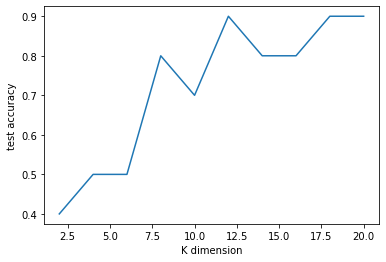

In [80]:
import matplotlib.pyplot as plt
plt.plot(k_list,k_accuracy)
plt.xlabel('K dimension')
plt.ylabel('test accuracy')
plt.show()

### polynomial

In [81]:
k_list=[]
k_accuracy=[]
for i in range(2,k+1,2):
  k_list.append(i)
  pca = PCA(n_components=i)
  pca.fit(images)
  new_data=pca.transform(images)
  classifier_linear = svm.SVC(kernel='poly')
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  k_accuracy.append(acc)
  print("for k=",i,"the accuracy is ",acc)



for k= 2 the accuracy is  0.3
for k= 4 the accuracy is  0.3
for k= 6 the accuracy is  0.4
for k= 8 the accuracy is  0.4
for k= 10 the accuracy is  0.5
for k= 12 the accuracy is  0.5
for k= 14 the accuracy is  0.5
for k= 16 the accuracy is  0.5
for k= 18 the accuracy is  0.5
for k= 20 the accuracy is  0.5


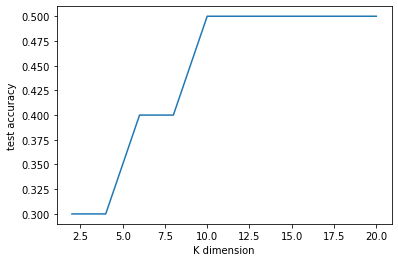

In [82]:
import matplotlib.pyplot as plt
plt.plot(k_list,k_accuracy)
plt.xlabel('K dimension')
plt.ylabel('test accuracy')
plt.show()

### radial

In [83]:
k_list=[]
k_accuracy=[]
for i in range(2,k+1,2):
  k_list.append(i)
  pca = PCA(n_components=i)
  pca.fit(images)
  new_data=pca.transform(images)
  classifier_linear = svm.SVC(kernel='rbf')
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  k_accuracy.append(acc)
  print("for k=",i,"the accuracy is ",acc)



for k= 2 the accuracy is  0.4
for k= 4 the accuracy is  0.2
for k= 6 the accuracy is  0.3
for k= 8 the accuracy is  0.3
for k= 10 the accuracy is  0.3
for k= 12 the accuracy is  0.3
for k= 14 the accuracy is  0.4
for k= 16 the accuracy is  0.4
for k= 18 the accuracy is  0.4
for k= 20 the accuracy is  0.4


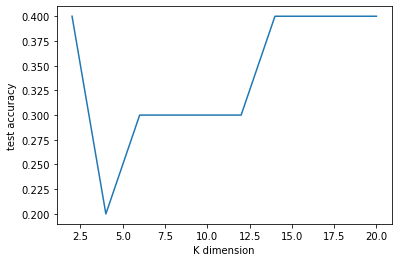

In [84]:
import matplotlib.pyplot as plt
plt.plot(k_list,k_accuracy)
plt.xlabel('K dimension')
plt.ylabel('test accuracy')
plt.show()

## Change in C

In [70]:
C=[0.001,0.01,0.1,1,2,5,10,50,100,500,1000]

In [71]:
pca = PCA(n_components=10)
pca.fit(images)
new_data=pca.transform(images)

### linear

In [72]:
C_accuracy=[]
for i in C:
  classifier_linear = svm.SVC(C=i,kernel='linear')
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  C_accuracy.append(acc)
  print("for C=",i,"the accuracy is ",acc)


for C= 0.001 the accuracy is  0.7
for C= 0.01 the accuracy is  0.7
for C= 0.1 the accuracy is  0.7
for C= 1 the accuracy is  0.7
for C= 2 the accuracy is  0.7
for C= 5 the accuracy is  0.7
for C= 10 the accuracy is  0.7
for C= 50 the accuracy is  0.7
for C= 100 the accuracy is  0.7
for C= 500 the accuracy is  0.7
for C= 1000 the accuracy is  0.7


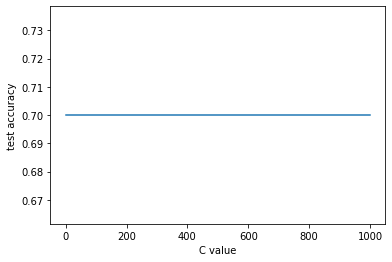

In [73]:
import matplotlib.pyplot as plt
plt.plot(C,C_accuracy)
plt.xlabel('C value')
plt.ylabel('test accuracy')
plt.show()

### polynomial

In [74]:
C_accuracy=[]
for i in C:
  classifier_linear = svm.SVC(C=i,kernel='poly')
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  C_accuracy.append(acc)
  print("for C=",i,"the accuracy is ",acc)


for C= 0.001 the accuracy is  0.4
for C= 0.01 the accuracy is  0.4
for C= 0.1 the accuracy is  0.4
for C= 1 the accuracy is  0.5
for C= 2 the accuracy is  0.5
for C= 5 the accuracy is  0.5
for C= 10 the accuracy is  0.5
for C= 50 the accuracy is  0.5
for C= 100 the accuracy is  0.5
for C= 500 the accuracy is  0.5
for C= 1000 the accuracy is  0.5


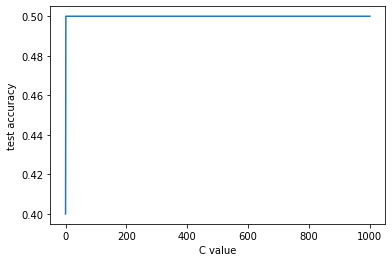

In [75]:
import matplotlib.pyplot as plt
plt.plot(C,C_accuracy)
plt.xlabel('C value')
plt.ylabel('test accuracy')
plt.show()

### radial

In [76]:
C_accuracy=[]
for i in C:
  classifier_linear = svm.SVC(C=i,kernel='rbf')
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  C_accuracy.append(acc)
  print("for C=",i,"the accuracy is ",acc)


for C= 0.001 the accuracy is  0.4
for C= 0.01 the accuracy is  0.4
for C= 0.1 the accuracy is  0.4
for C= 1 the accuracy is  0.3
for C= 2 the accuracy is  0.4
for C= 5 the accuracy is  0.6
for C= 10 the accuracy is  0.6
for C= 50 the accuracy is  0.7
for C= 100 the accuracy is  0.7
for C= 500 the accuracy is  0.7
for C= 1000 the accuracy is  0.7


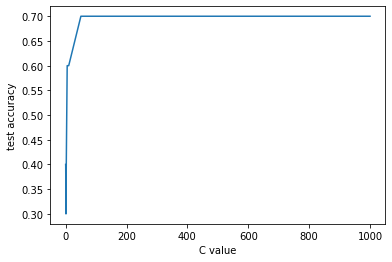

In [77]:
import matplotlib.pyplot as plt
plt.plot(C,C_accuracy)
plt.xlabel('C value')
plt.ylabel('test accuracy')
plt.show()

## change of kernels

### linear

In [39]:
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(new_data, y)
new_data_test=pca.transform(images_test)
pred=classifier_linear.predict(new_data_test)
acc=accuracy_score(y_test,pred)
print("the accuracy for linear kernel is ",acc)

the accuracy for linear kernel is  0.9


### polynomial


In [40]:
classifier_linear = svm.SVC(kernel='poly')
classifier_linear.fit(new_data, y)
new_data_test=pca.transform(images_test)
pred=classifier_linear.predict(new_data_test)
acc=accuracy_score(y_test,pred)
print("the accuracy for polynomial kernel is ",acc)

the accuracy for polynomial kernel is  0.5


### radial

In [41]:
classifier_linear = svm.SVC(kernel='rbf')
classifier_linear.fit(new_data, y)
new_data_test=pca.transform(images_test)
pred=classifier_linear.predict(new_data_test)
acc=accuracy_score(y_test,pred)
print("the accuracy for radial kernel is ",acc)

the accuracy for radial kernel is  0.4


## Change of tolerance

In [97]:
tol=[1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]
tol=tol[::-1]


### linear

In [98]:
tol_accuracy=[]
for i in tol:
  classifier_linear = svm.SVC(C=1,kernel='linear',tol=i)
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  tol_accuracy.append(acc)
  print("for tolerance =",i,"the accuracy is ",acc)


for tolerance = 0.0001 the accuracy is  0.9
for tolerance = 0.0005 the accuracy is  0.9
for tolerance = 0.001 the accuracy is  0.9
for tolerance = 0.005 the accuracy is  0.9
for tolerance = 0.01 the accuracy is  0.9
for tolerance = 0.05 the accuracy is  0.9
for tolerance = 0.1 the accuracy is  0.9
for tolerance = 0.5 the accuracy is  0.9
for tolerance = 1 the accuracy is  0.9


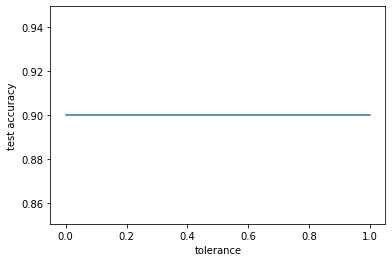

In [99]:
import matplotlib.pyplot as plt
plt.plot(tol,tol_accuracy)
plt.xlabel('tolerance')
plt.ylabel('test accuracy')
plt.show()

### polynomial

In [104]:
tol_accuracy=[]
for i in tol:
  classifier_linear = svm.SVC(C=1,kernel='poly',tol=i)
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  tol_accuracy.append(acc)
  print("for tolerance =",i,"the accuracy is ",acc)


for tolerance = 0.0001 the accuracy is  0.5
for tolerance = 0.0005 the accuracy is  0.5
for tolerance = 0.001 the accuracy is  0.5
for tolerance = 0.005 the accuracy is  0.5
for tolerance = 0.01 the accuracy is  0.5
for tolerance = 0.05 the accuracy is  0.5
for tolerance = 0.1 the accuracy is  0.5
for tolerance = 0.5 the accuracy is  0.5
for tolerance = 1 the accuracy is  0.5


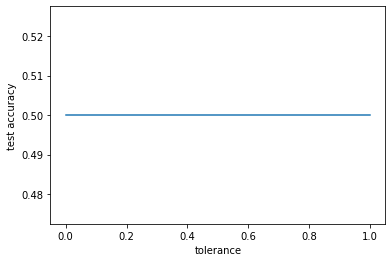

In [105]:
import matplotlib.pyplot as plt
plt.plot(tol,tol_accuracy)
plt.xlabel('tolerance')
plt.ylabel('test accuracy')
plt.show()

### radial

In [106]:
tol_accuracy=[]
for i in tol:
  classifier_linear = svm.SVC(C=1,kernel='rbf',tol=i)
  classifier_linear.fit(new_data, y)
  new_data_test=pca.transform(images_test)
  pred=classifier_linear.predict(new_data_test)
  acc=accuracy_score(y_test,pred)
  tol_accuracy.append(acc)
  print("for tolerance =",i,"the accuracy is ",acc)


for tolerance = 0.0001 the accuracy is  0.4
for tolerance = 0.0005 the accuracy is  0.4
for tolerance = 0.001 the accuracy is  0.4
for tolerance = 0.005 the accuracy is  0.4
for tolerance = 0.01 the accuracy is  0.4
for tolerance = 0.05 the accuracy is  0.4
for tolerance = 0.1 the accuracy is  0.4
for tolerance = 0.5 the accuracy is  0.4
for tolerance = 1 the accuracy is  0.5


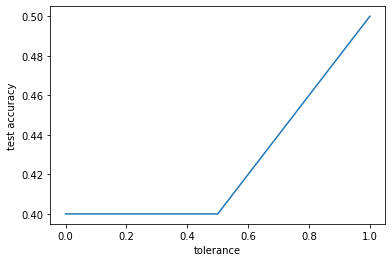

In [107]:
import matplotlib.pyplot as plt
plt.plot(tol,tol_accuracy)
plt.xlabel('tolerance')
plt.ylabel('test accuracy')
plt.show()

# b

## LDA

In [130]:
k=15
from sklearn.decomposition import PCA
pca = PCA(n_components=k)
pca.fit(images)
new_data=pca.transform(images)
new_data_test=pca.transform(images_test)

In [131]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda=LinearDiscriminantAnalysis()
lda.fit(new_data,y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [132]:
pred=lda.predict(new_data)
acc=accuracy_score(y,pred)
print("accuarcy of LDA on train data=",acc)

accuarcy of LDA on train data= 1.0


In [133]:
pred=lda.predict(new_data_test)
acc=accuracy_score(y_test,pred)
print("accuarcy of LDA on test data=",acc)

accuarcy of LDA on test data= 0.9


# Observations

**Performance**: 

Generally SVM is better than LDA classifier but LDA outperforms SVM when number of features is small in size

**Problem Formulation**:

### similarities

Both Linear Discriminant Analysis and Support Vector Machines compute hyperplanes that are optimal with respect to their individual objectives.

### differences

SVM classification has an optimization problem which contains a dual and a primal formulation that allows the user to optimize over either the number of data points or the number of variables.

SVM can make use of kernels to transform the SVM classifier from a linear classifier into a non-linear classifier.

LDA makes use of the entire data set to estimate covariance matrices and thus prone to outliers.




